# Simple Linear Regression | Univariate Linear Regression | Linear Regression in one variable

**Update! Aug'18**

Exploring Simple Linear Regression using ***analytical or closed-form math solution.***

** Linear model: **  $ y = \beta_0 + \beta_1x $

In the above equation, what does each term represent?
* $y$ is the __response or dependent__ variable
* $x$ is the __feature or independent__ variable
* $\beta_0$ is the __intercept__
* $\beta_1$ is the __coefficient of x or slope__ of the regression line

**Objective: ** Estimate model parameters (β0 and β1) using the analytical solution. 

**Dataset(original link): ** [Sweden Auto Insurance data - broken](https://www.math.muni.cz/~kolacek/docs/frvs/M7222Q/data/AutoInsurSweden.txt)

- ___The original link for downloading data no longer exists however, the data can be found on the link below.___

**Dataset(New link): ** [Sweden Auto Insurance data - personal upload](https://data.world/anujonthemove/auto-insurance-in-sweden)


Author: Anuj Khandelwal (@anujonthemove)

## Predicting payment for auto insurance claims in Sweden.

* The purpose of this notebook is to predict the total payment for all claims (in thousands of Swedish Kronor), given the total number of claims.

* This is a supervised, regression problem.
    * **Supervised** - Target variable are included in the dataset.
    *  **Regression** - The target variable is continuous.

**Note:** ***Exploratory data analysis*** has been carried out [here](EDA-Auto-Insurance-in-Sweden.ipynb) in a separate notebook

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('darkgrid')

import pylab 
import scipy.stats as stats

## Utility functions

In [2]:
# function to split data
def split_data(data):
    # converting dataframe objects to numpy arrays for easier math
    return np.array(data.iloc[:, 0:1]), np.array(data.iloc[:, 1:2])  

In [3]:
# calculation of model coefficients b0 and b1
def estimateCoefficients(x, y):
    
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # formula can be found at: http://www.public.iastate.edu/~alicia/stat328/Least%20Squares.pdf
    # for derivation for this formula, check the wikipedia link in reference section
    SSxy = np.sum((x-m_x)*(y-m_y)) # covariance of xy
    SSxx = np.sum(np.power((x-m_x), 2)) # variance of x
         
    b1 = SSxy / SSxx
    b0 = m_y - b1 * m_x
    
    return b0, b1

In [4]:
# function to predict values on test data
# a more optimized approach would be the vectorized version
def predict(coeff, testData):
    y_pred = []
    for i in range(len(testData)):
        y_pred.append(coeff[0] + coeff[1]*testData[i])
    return y_pred

## Load and prepare data

In [5]:
# Load data using pandas read_csv helper
data = pd.read_csv('../datasets/regression/univariate-regression/auto-insurance-data/auto_insurance_sweden.csv', sep=','
                 , names=['num_claims', 'total_payment'], skiprows=1)
print('Dataset Shape', data.shape)
data.head()

('Dataset Shape', (63, 2))


,num_claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


This dataset contains a total of 63 rows(observations) and 2 columns(features) including the target variable 'total payment'. It is clear from the above that both variables are continuous.

In [6]:
# Prepare data
# Split the data set into feature vector (X) and target vector (y)
X, y = split_data(data)

## Checking assumptions of Linear Regression

In order to apply linear regression, the data should qualify certain assumptions otherwise the linear models doesn't work as expected.

While some of the assumptions can be checked without building model, remaining assumptions require model to be built once, calcluate __residuals__  and using these residuals to check the assumptions, therefore residual analysis becomes quintessential here.

Assumptions based on residuals:

* Linearity of residuals
* Statistical Independence of residuals
* Normal distribution of residuals
* Constant variance or homoscedasticity of residuals

I carried out an in-depth search on this topic and it turns out that there are a lot of things to be taken into account. I have tried to put many things in this notebook still, a many of the concepts are unexplored and are needed to be incorporated in this work in order to have a thorough understanding of Linear Regression model. Some of the links which I referred to learn are:

* https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/
* http://statisticsbyjim.com/regression/ols-linear-regression-assumptions/
* https://statistics.laerd.com/spss-tutorials/linear-regression-using-spss-statistics.php
* http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#outlier-header
* http://www.statisticssolutions.com/assumptions-of-linear-regression/
* http://r-statistics.co/Assumptions-of-Linear-Regression.html
* http://people.duke.edu/~rnau/testing.htm


## Assumptions to be checked before building the model

### Assumption #01: Both dependent(y) and independent(X) variables should be continuous. 

This is the most basic check that should be performed to check the applicability of Simple Linear Regression model.
In this example, it is clear in the EDA step itself that both the variable involved are ___continuous___.

### Assumption #02: The relationship between the independent and dependent variable should be Linear.

 The linearity assumption can best be tested with scatter plots [5].

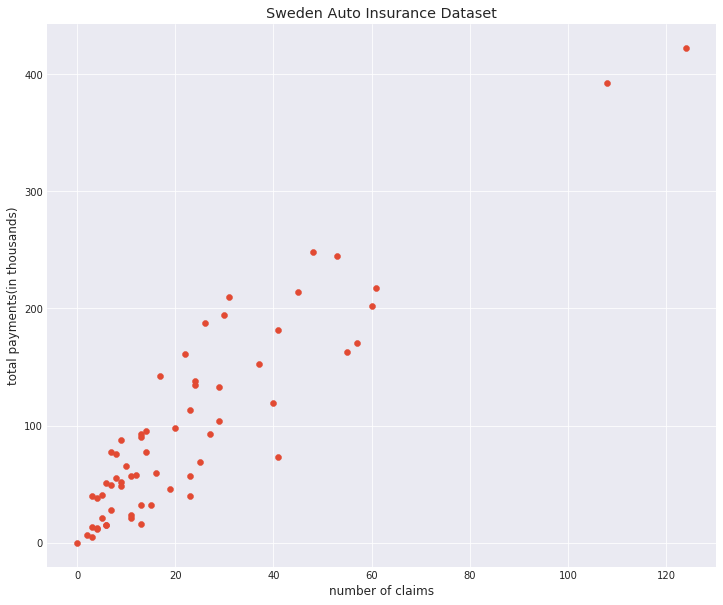

In [7]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create scatterplot
ax.scatter(X, y)

# Set common labels
ax.set_xlabel('number of claims')
ax.set_ylabel('total payments(in thousands)')

ax.set_title('Sweden Auto Insurance Dataset');

# Save the figure, if needed
# fig.savefig('fig1.png', bbox_inches='tight')

###### way to plot without subplots
# plt.figure(figsize=(12, 10))
# # plotting points as a scatter plot
# plt.scatter(X, y)
 
# # x-axis label
# plt.xlabel('number of claims')
# # frequency label
# plt.ylabel('total payments(in thousands)')
# # plot title
# plt.title('Sweden Auto Insurance Dataset')
# # showing legend
# plt.legend()
 
# # function to show the plot
# plt.show()

#### Interpretation 
In the scatter plot above, it can be seen that the response(y) and the predictor(X) variable have a linear relationship, therefore, the assumption is satisfied.

## Build model 

**Theory:** For linear model, the coefficients are estimated using the least squares criterion which means we find the best-fit line through the training data which minimizes the sum of squared residuals or "sum of squared errors".

**(Train)** Build a linear model i.e., estimate or learn model coefficients: $\beta_0$ and $\beta_1$

**(Predict)** Use the built model to predict total payments against the claims made. 

In [8]:
# split train and validation sets

# train data
X_train = X[:-5]
y_train = y[:-5]

# validation data: used to evaluate accuracy of the model
# Accuracy check is best done using cross-validation but since the data is very small, 
# I have indeed set aside a few observation from the training data to evaluate the model. 
# The error function or the evaluation function used here is Root Mean Squared error (RMSE).
X_val = X[-5:]
y_val = y[-5:]

In [9]:
# Estimate coefficients 
# train linear model on part dataset 
coeff = estimateCoefficients(X_train, y_train)

## Plotting least squares regression line
This shows how least square line (the coefficients for which we just estimated above) fits our data.

* __Note:__ This step is not enough to assess the our model, we need to use the ___actual(y), predicted(y_pred) and 'residuals(y-y_pred)'___ to evaluate and improve our model. Essentially, we need to analyze Residuals.

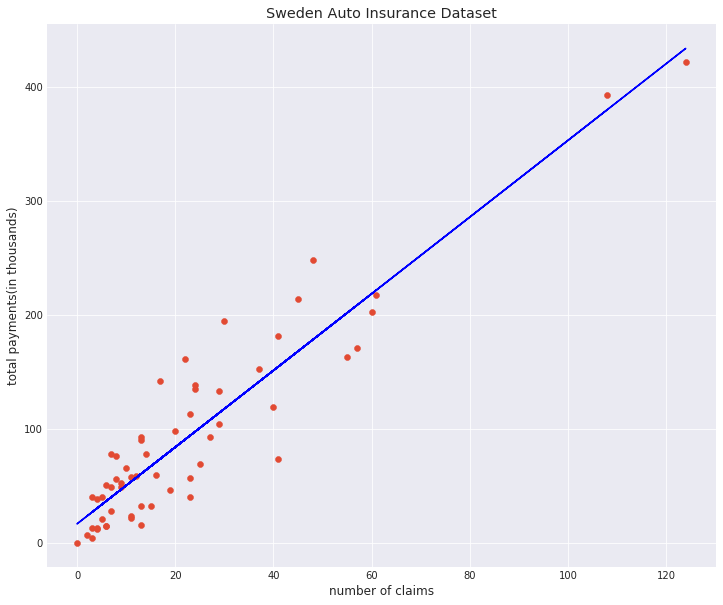

In [10]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# predicted response vector
y_pred = coeff[0] + coeff[1]*X_train

# Create scatterplot
ax.scatter(X_train, y_train)
ax.plot(X_train, y_pred, color="b")

# Set common labels
ax.set_xlabel('number of claims')
ax.set_ylabel('total payments(in thousands)')
ax.set_title('Sweden Auto Insurance Dataset')

plt.show()
# Save the figure, if needed
# fig.savefig('fig1.png', bbox_inches='tight')

## Calculating Residuals

In [11]:
# on training data
y_pred_train = predict(coeff, X_train)
residuals_train = y_train - y_pred_train

# on validation data
y_pred_val = predict(coeff, X_val)
residuals_val = y_val - y_pred_val

## Assumptions to be checked after building the model

### Plot of residuals - needed for validating assumptions
Many different interpretations can be carried out using residual analysis. 
Some of the assumptions and diagnosis have been stated below.

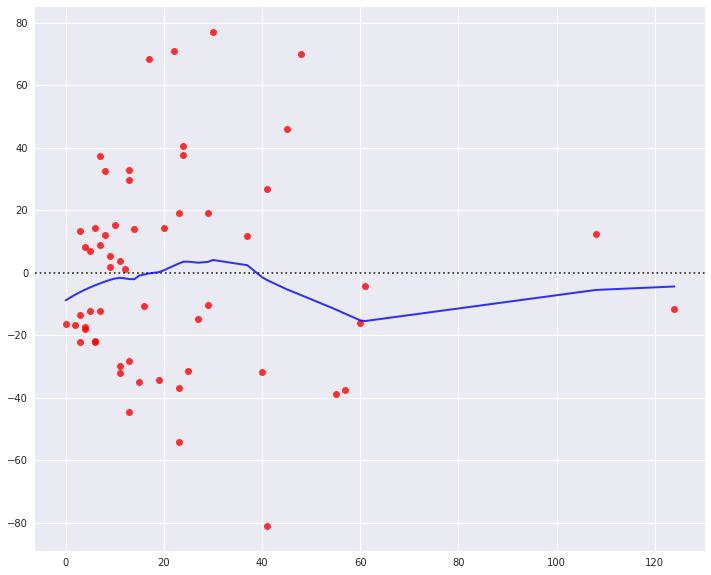

In [12]:
# sns.set(style="darkgrid", rc={'figure.figsize':(12, 10)})
sns.set(style="darkgrid")
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))
ax = fig.add_subplot(111)

# Plot the residuals after fitting a linear model
ax = sns.residplot(X_train.ravel(), y_train.ravel(), lowess=True, color="r", 
                   line_kws={'color': 'blue', 'lw': 2, 'alpha': 0.8})

In [13]:
# Other way to plot residuals using matplotlib
# # Create a figure instance
# fig = plt.figure(1, figsize=(12, 10))

# # Create an axes instance
# ax = fig.add_subplot(111)

# ## plot of residuals

# # plotting residual errors in training data
# ax.scatter(y_pred_train, residuals_train, color = "green", label='Train data')

# # plotting residual errors in test data
# ax.scatter(y_pred_val, residuals_val, color = "blue", label = 'Validation data')

# ## plotting line for zero residual error
# ax.hlines(y = 0, xmin=0, xmax=np.max(y_train), linewidth = 2)

# ## plotting legend
# ax.legend(loc='upper right')
 
# # Set common labels
# ax.set_xlabel('Residuals')
# ax.set_ylabel('Fitted values')
# ax.set_title('Residual errors | Residuals vs Fitted')

# plt.show()

# # Save the figure, if needed
# # fig.savefig('fig1.png', bbox_inches='tight')

# Check this to plot a smooth curve partially using statsmodel library:

# https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

### Revisiting Assumption #02 - interpreting it with plot of residuals

If there is a nonlinear pattern it gets very clear in the residual plots. You may be wondering why we bothered talking about finding a linear pattern again when we already saw it in the scatter plot above in __Assumption #2__. Well, that works well for low dimensional data as it is easy to visualize but how will you know if you have more than 2-3 features? ___The residual plot is a powerful tool in that case and something you should leverage often.___ [5]

### Assumption #03: Check for outliers 
* It is important to __check for outliers since linear regression is sensitive to outlier effects__. In the above plot, we don't see any outliers therefore, we can safely say that the modle won't suffer due to outliers.

### Assumption #04: Check for Homoscedasticity of the residuals

* __Homoscedasticity__ means the residuals are equal across the regression line or the variances along the best fit line should remain similar as we move along the line or the errors exhibit constant variance. 

* Heteroscedasticity, on the other hand, is what happens when errors show some sort of growth. The tell tale sign you have heteroscedasticity is a fan-like shape in your residual plot.

* This doesn’t inherently create a problem, but it’s often an indicator that your model can be improved.

* Why is this test still important?
    - ___Standard errors, confidence intervals, and hypothesis tests rely on the assumption that errors are homoscedastic___. If this assumption is violated, you cannot trust values for the those metrics!

#### Interpretation 
In the plot above, one can see that the assumption is satisfied by the data, i.e., the data is fit for linear regression, residuals are indeed homoscedastic. 

### Histogram of residuals - test of normality
Plot a histogram of residuals determines that the residuals are Normally distributed. This is important for the linear case. [4]

#### Interpretation 
The plot below shows that the data is approximately Normal (aka Gaussian).

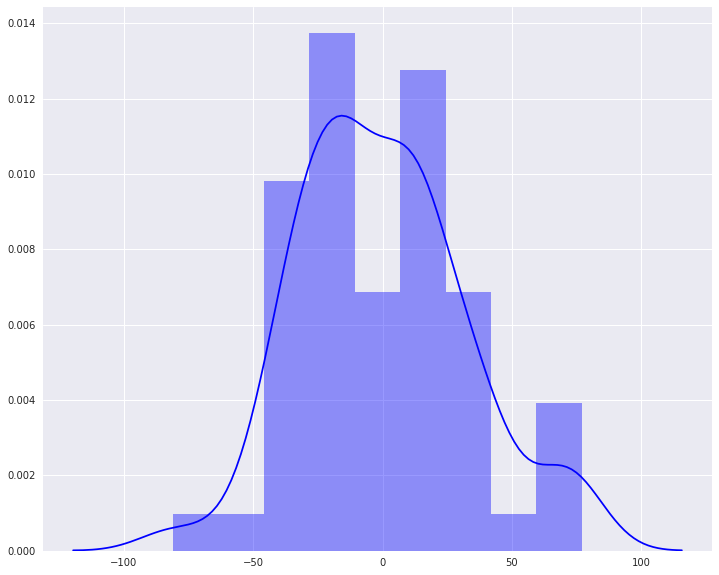

In [14]:
sns.set(style="darkgrid")
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))
ax = fig.add_subplot(111)

# Plot the residuals after fitting a linear model
ax = sns.distplot(residuals_train, color="blue");

### Is there any other way we can test Normality? Yes,  there is a Quantitative method to test for Normality

The null hypothesis is that the residual distribution is Normally distributed (though we can see it above). 
In the test below, we can see since the p-value > 0.05, we cannot reject the null hypothesis. In other words, we can confidently say the residuals are Normally distributed.

In [15]:
from scipy.stats import normaltest
print(normaltest(residuals_train))

NormaltestResult(statistic=array([1.65118327]), pvalue=array([0.43797579]))


### Normality Q-Q Plot

Q-Q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution. []

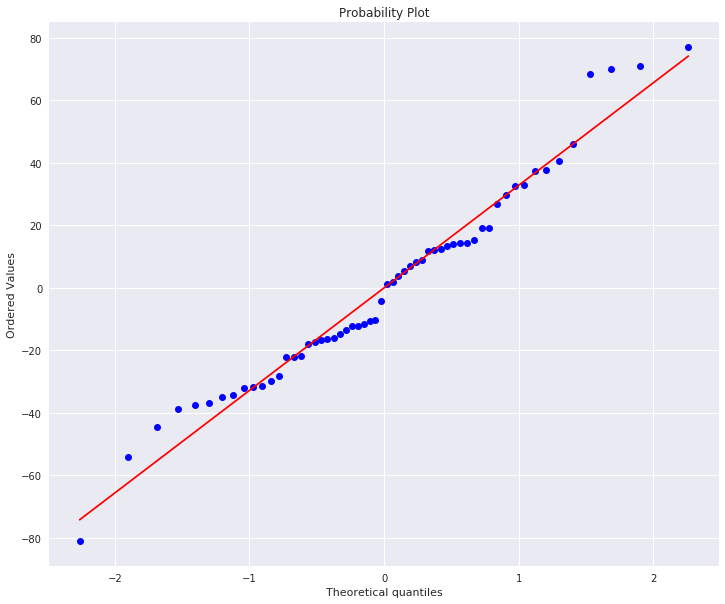

In [16]:
sns.set(style="darkgrid")
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))
ax = fig.add_subplot(111)

# we may even want to standardize the residuals before making the probability plot
# from sklearn import preprocessing
# std_residuals_train = preprocessing.scale(residuals_train)

# Plot the residuals after fitting a linear model
ax = stats.probplot(residuals_train.ravel(), dist="norm", plot=pylab)
plt.show()

## Model evaluation
* Top 5 metrics for evaluating regression models: 
http://www.enlistq.com/top-5-metrics-evaluating-regression-models/
* More on error metrics: 
https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/

In [17]:
### Prediction on validation data
y_val_pred = predict(coeff, X_val)

#### 1. Explained Variance Score (EVS)

In [18]:
explained_variance_score_val = (1 - (np.var(y_val - y_val_pred))/(np.var(y_val)))
print('Explained Variance Score: {}'.format(explained_variance_score_val))

# # can also be calculated using scikit learn
# from sklearn.metrics import explained_variance_score
# explained_variance_score(y_pred_val, y_val, multioutput='uniform_average')

Explained Variance Score: 0.865109634557


#### 2. Mean Absolute Error (MAE)

In [19]:
mean_absolute_error = np.mean((np.abs(y_val - y_val_pred)))
print('Mean Absolute Error: {}'.format(mean_absolute_error))

# # can also be calculated using scikit learn
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_val, y_val_pred)

Mean Absolute Error: 59.0198557978


#### 3. Mean Squared Error (MSE)

In [20]:
mean_squared_error = np.mean((np.square(y_val - y_val_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error))

# # can also be calculated using scikit learn
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_val, y_val_pred)

Mean Squared Error: 4014.8505904


#### 4. Root Mean Squared Error(RMSE)

In [21]:
root_mean_squared_error = np.sqrt(np.mean((np.square(y_val - y_val_pred))))
print('Root Mean Squared Error: {}'.format(root_mean_squared_error))

# # CANNOT be calculated directly using scikit learn
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(y_val, y_val_pred))

Root Mean Squared Error: 63.3628486607


**Interpretation:**

It can be seen that RMSE value is large. It can be said that the model doesn't fit the data very well.

This can be attributed to the fact that we have a very small dataset(63 rows) for training.

#### 5. R Squared Score (R2 Score)

In [22]:
r2_score_val = (1-(np.sum(np.square(y_val - y_val_pred))/np.sum(np.square(y_val - np.mean(y_val)))))
print('R2 Score: {}'.format(r2_score_val))

# # can also be calculated using scikit learn
# from sklearn.metrics import r2_score
# r2_score(y_val, y_val_pred)

R2 Score: -0.0189225114972


#### 6. Adjusted R2 Score

In [23]:
# n is sample size
n = X_train.shape[0]
# p is number of independent variables.
p = X_train.shape[1]

Adjusted_R2_score =  (1-(((1-r2_score_val)*((n-1))/(n-p-1))))
print('Adjusted R2 score: {}'.format(Adjusted_R2_score))

Adjusted R2 score: -0.0371175563454


## Prediction
Using the equation: $y_{pred} = b[0] + b[1]x $, we can make predictions for total payements (y) given claims (x). 

Unseen, new data is used here.

In [24]:
# unseen test data set
X_test = np.array([31, 14, 53, 26, 100, 120, 95, 200])

# make predictions on new data using the coefficients obtained above
y_pred_val = predict(coeff, X_test)
pd.DataFrame({'X_test': X_test, 'y_pred': y_pred_val})

,X_test,y_pred
0,31,120.749100
1,14,63.532681
2,53,194.793876
3,26,103.920741
4,100,352.980444
5,120,420.293878
6,95,336.152086
7,200,689.547611


## Observation
* statsmodel and seaborn library have best support for linear regression, therefore, it's not a great idea to re-invent the wheel using matplotlib.

## More on plots
1. https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
2. https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions
3. https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
4. https://data.library.virginia.edu/diagnostic-plots/
5. https://www.youtube.com/watch?v=EB5a_vENd5Q
6. https://www.analyticsvidhya.com/blog/2013/12/residual-plots-regression-model/
7. https://www.r-bloggers.com/model-validation-interpreting-residual-plots/
8. https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots - box plot interpretation
9. https://blog.modeanalytics.com/violin-plot-examples/ - interpretation of violin plot

## References
1. http://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
2. https://en.wikipedia.org/wiki/Simple_linear_regression
3. https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
4. https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/
5. http://www.statisticssolutions.com/assumptions-of-linear-regression/
6. https://www.analyticsvidhya.com/blog/2015/10/regression-python-beginners/ - best explained how we can visualize the variance of one variable with other using VENN graph
7. https://www.kaggle.com/dprater513/eda-basic-linear-regression
8. https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html
9. https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt
10. https://github.com/RishiSD/Linear-regression-on-Swedish-Auto-Insurance-dataset/blob/master/Swedish%20Auto%20Insurance.ipynb